### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage ,fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('vehicle.csv')
df.dropna()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,van
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,car


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

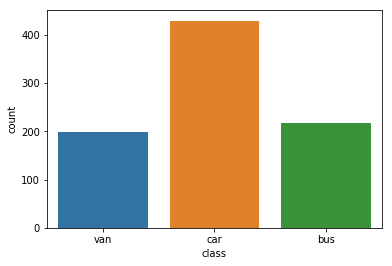

In [3]:
sns.countplot(x=df['class'])

### Check for any missing values in the data 

In [4]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [5]:
df.fillna(df.median(),inplace=True)
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [6]:
X = df.drop('class', axis=1)
Y=df['class']
X=X.apply(zscore)

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

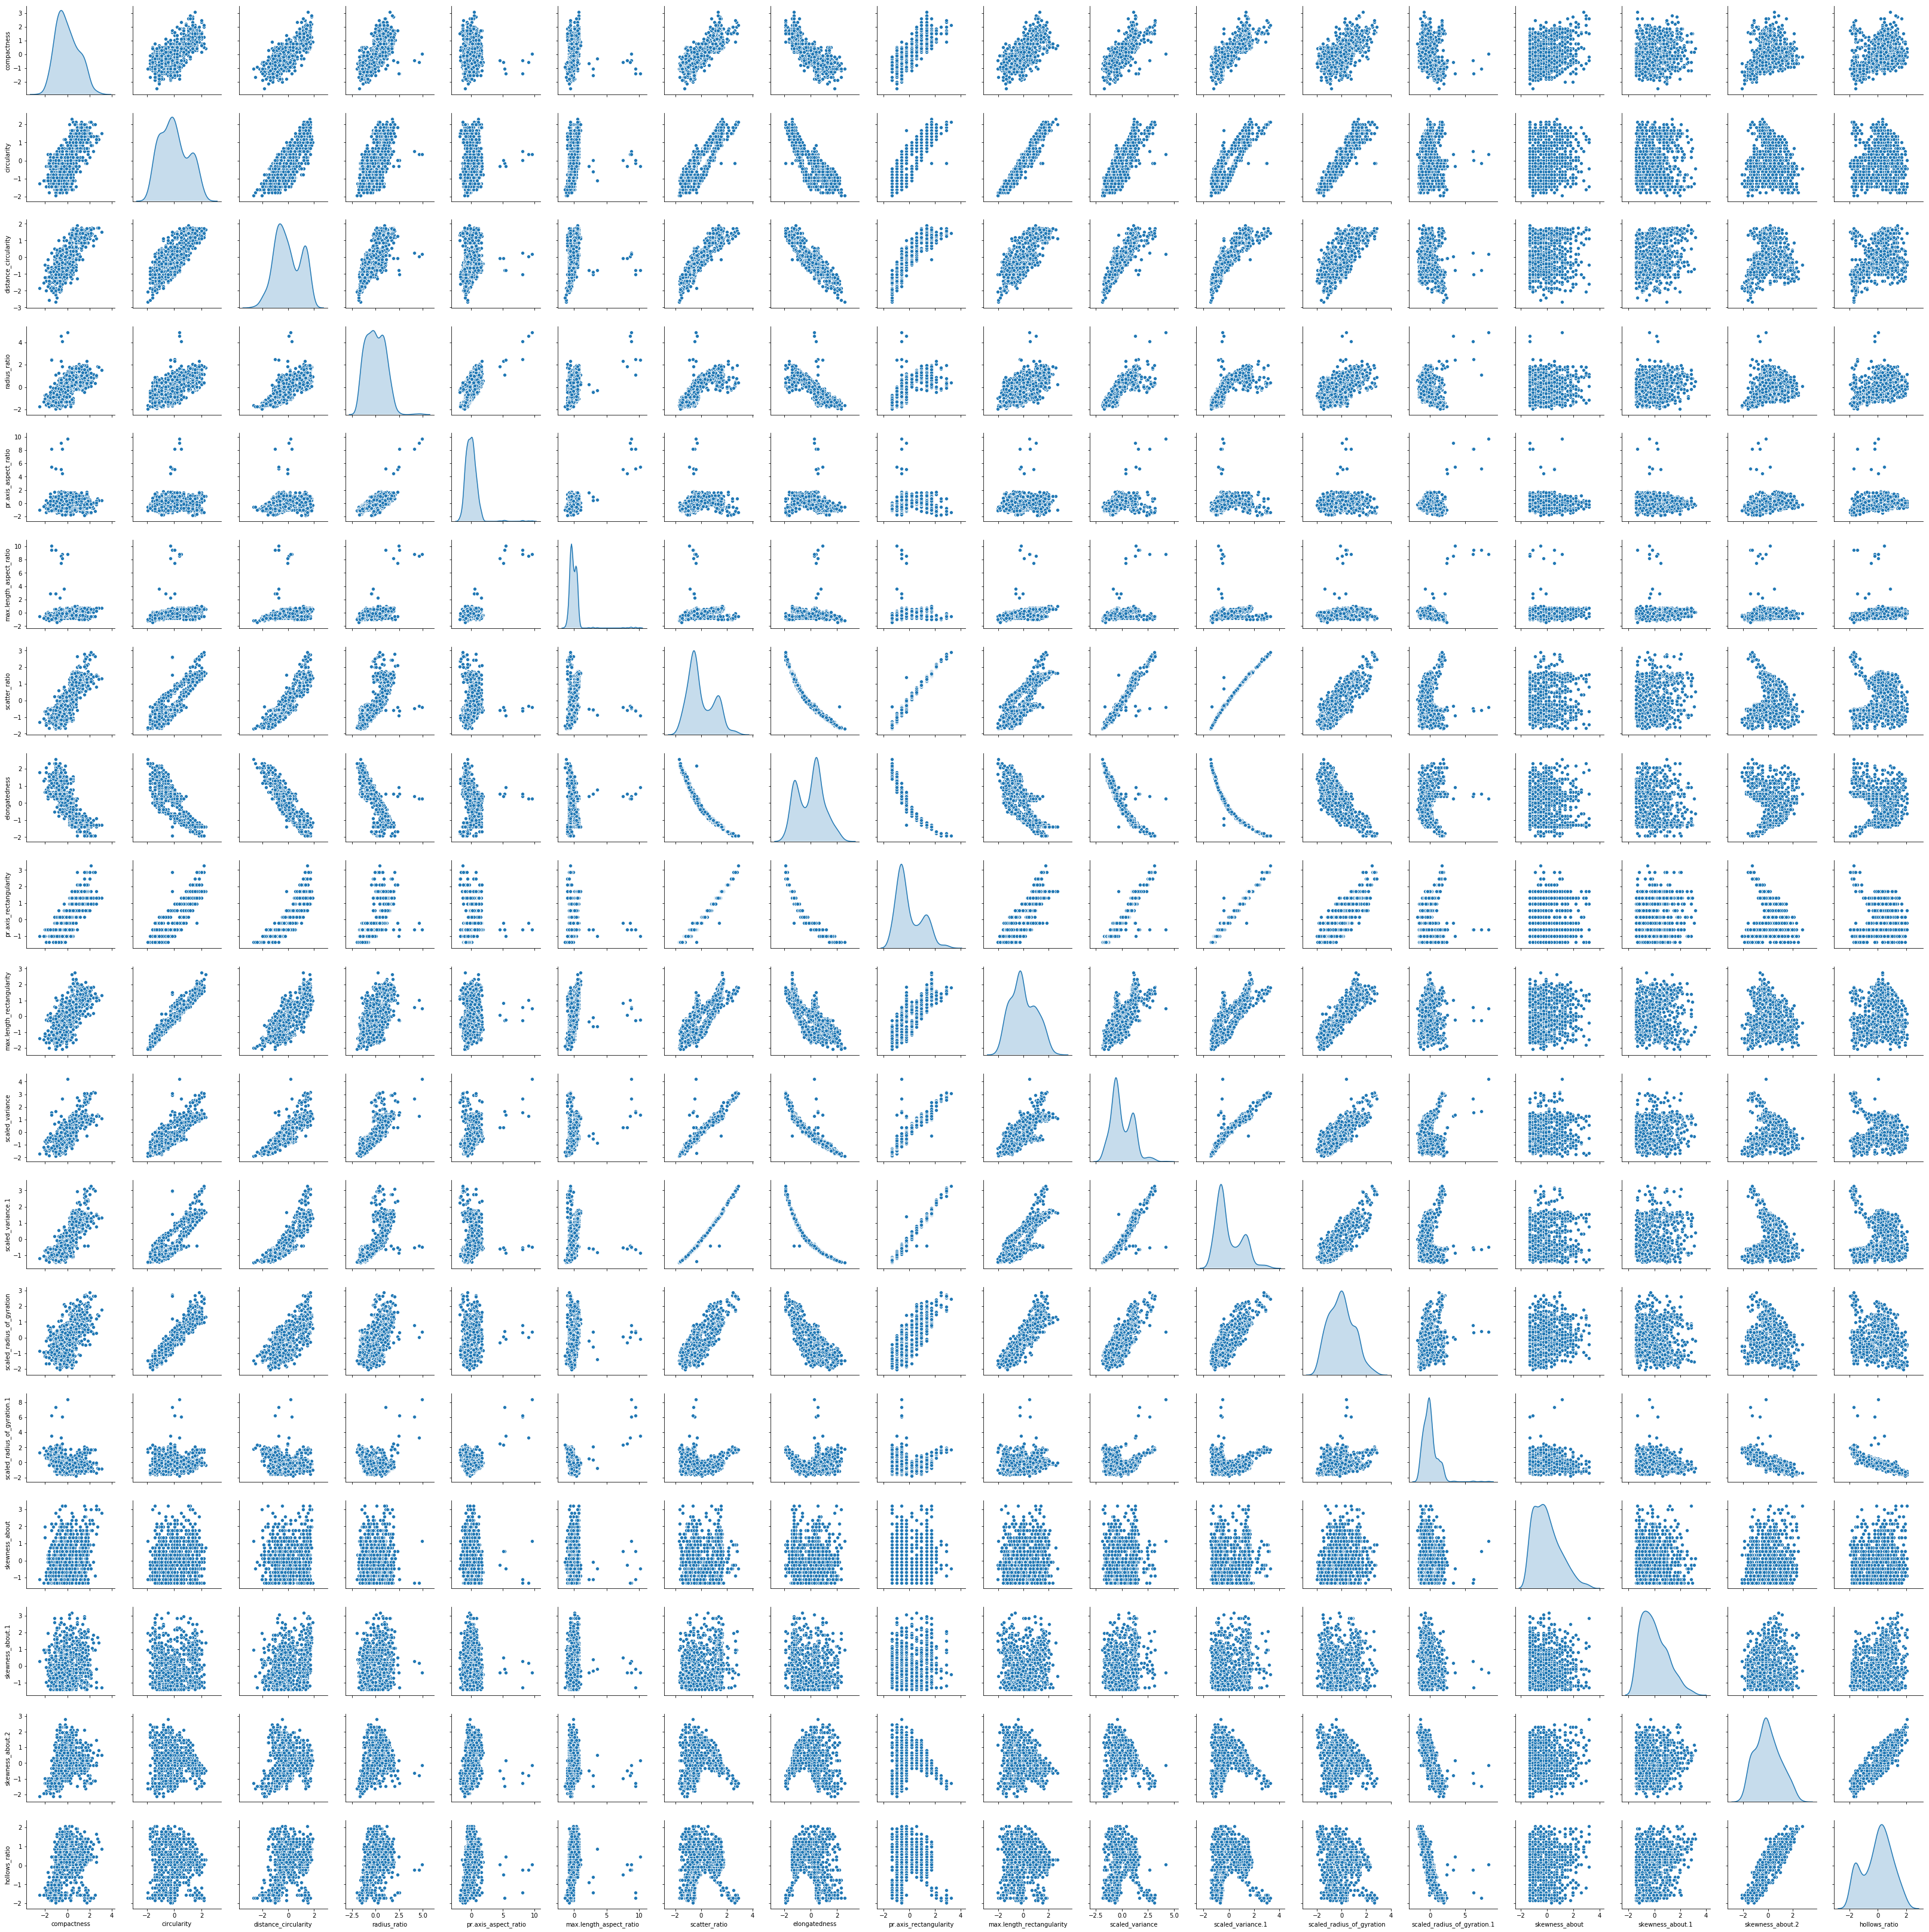

In [7]:
sns.pairplot(X,diag_kind='kde')

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [8]:
distortion=[]

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [9]:
cluster_range = range( 1, 10)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X)
    labels = clusters.labels_                     
    centroids = clusters.cluster_centers_         
    distortion.append(sum(np.min(distance.cdist(X, clusters.cluster_centers_, 'euclidean'), axis=1))/ X.shape[0])
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "distortion": distortion} )
clusters_df[0:15]

,num_clusters,distortion
0,1,3.940521
1,2,2.973104
2,3,2.646781
3,4,2.555422
4,5,2.435667
5,6,2.326550
6,7,2.248625
7,8,2.175438
8,9,2.110275


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

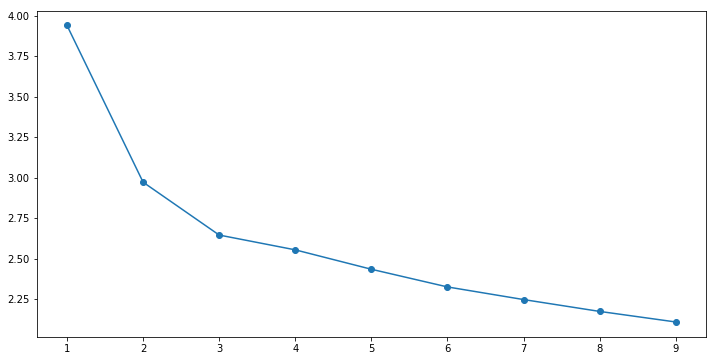

In [10]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.distortion, marker = "o" )

### Find out the optimal value of K

The elbow plot confirms our visual analysis that there are likely 3 good clusters

In [11]:
clusters3 = KMeans(3)
clusters3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [12]:
centroid = clusters3.cluster_centers_
centroid

array([[ 1.12910644,  1.16153761,  1.18636673,  1.01027366,  0.20524367,
         0.33392769,  1.26850477, -1.19027456,  1.26783179,  1.09386865,
         1.21391719,  1.27095096,  1.0790498 , -0.01160786,  0.16776807,
         0.24782724, -0.00228148,  0.16664907],
       [-0.23349403, -0.57153473, -0.30562451, -0.02786232,  0.21165402,
        -0.11468442, -0.46634164,  0.33174024, -0.48957038, -0.53949628,
        -0.41635127, -0.46576658, -0.60482025, -0.62783219, -0.05874198,
         0.01821756,  0.81094356,  0.70461392],
       [-0.92864012, -0.52284917, -0.89704331, -1.06722562, -0.50045717,
        -0.21508392, -0.77699704,  0.86722532, -0.74594327, -0.49074692,
        -0.78261572, -0.78041977, -0.38929705,  0.83213976, -0.10659346,
        -0.29449685, -1.05596825, -1.10171917]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [13]:
centroid_df = pd.DataFrame(centroid, columns = list(X))
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.129106,1.161538,1.186367,1.010274,0.205244,0.333928,1.268505,-1.190275,1.267832,1.093869,1.213917,1.270951,1.079050,-0.011608,0.167768,0.247827,-0.002281,0.166649
1,-0.233494,-0.571535,-0.305625,-0.027862,0.211654,-0.114684,-0.466342,0.331740,-0.489570,-0.539496,-0.416351,-0.465767,-0.604820,-0.627832,-0.058742,0.018218,0.810944,0.704614
2,-0.928640,-0.522849,-0.897043,-1.067226,-0.500457,-0.215084,-0.776997,0.867225,-0.745943,-0.490747,-0.782616,-0.780420,-0.389297,0.832140,-0.106593,-0.294497,-1.055968,-1.101719


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [14]:
labels = clusters3.labels_
labels

array([1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2,
       1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 0, 1, 2,
       1, 2, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 0,
       1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 1,
       1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2,
       2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1,
       0, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 1,
       2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1,
       0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1,
       1, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [15]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [16]:
col='X1','X2'
df_a=pd.DataFrame(data=a, columns=col)
df_b=pd.DataFrame(data=b, columns=col)
df_c=pd.DataFrame(data=c, columns=col)
df=pd.concat([df_a,df_b,df_c])
df

,X1,X2
0,8.427239,-1.359965
1,9.456753,0.724087
2,9.563263,-2.757512
3,9.115645,3.091636
4,9.129796,-1.869233
5,12.493880,1.369493
6,12.707069,-0.222524
7,12.004200,0.795934
8,12.118990,4.058338
9,12.276388,-1.324895


### 10. Use scatter matrix to print all the 3 distributions

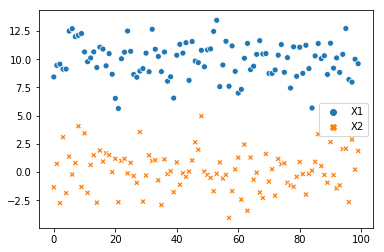

In [17]:
sns.scatterplot(data=df_a)

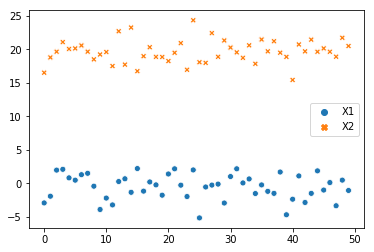

In [18]:
sns.scatterplot(data=df_b)

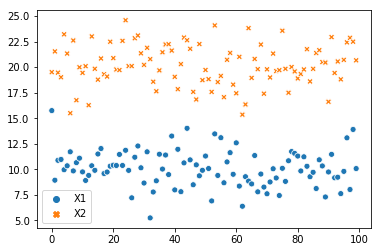

In [19]:
sns.scatterplot(data=df_c)

### 11. Find out the linkage matrix

Use ward as linkage metric and distance as Eucledian

In [20]:
Z = linkage(df, 'ward','euclidean')
Z

array([[1.72000000e+02, 1.85000000e+02, 3.73629054e-02, 2.00000000e+00],
       [1.21000000e+02, 1.31000000e+02, 5.58522834e-02, 2.00000000e+00],
       [2.30000000e+01, 3.60000000e+01, 5.88784153e-02, 2.00000000e+00],
       [1.88000000e+02, 2.18000000e+02, 6.26115340e-02, 2.00000000e+00],
       [4.00000000e+01, 8.50000000e+01, 7.88166452e-02, 2.00000000e+00],
       [2.00000000e+02, 2.32000000e+02, 9.19469026e-02, 2.00000000e+00],
       [1.80000000e+01, 6.90000000e+01, 9.34369814e-02, 2.00000000e+00],
       [1.79000000e+02, 2.22000000e+02, 9.94745471e-02, 2.00000000e+00],
       [1.20000000e+01, 8.70000000e+01, 1.10858461e-01, 2.00000000e+00],
       [1.02000000e+02, 1.44000000e+02, 1.13279165e-01, 2.00000000e+00],
       [1.18000000e+02, 1.28000000e+02, 1.13982394e-01, 2.00000000e+00],
       [1.69000000e+02, 1.73000000e+02, 1.15556740e-01, 2.00000000e+00],
       [1.60000000e+01, 3.30000000e+01, 1.20516427e-01, 2.00000000e+00],
       [4.20000000e+01, 6.60000000e+01, 1.20944898e

### 12. Plot the dendrogram for the consolidated dataframe

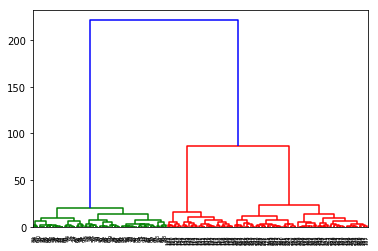

In [21]:
dn=dendrogram(Z)

### 13. Recreate the dendrogram for last 12 merged clusters 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

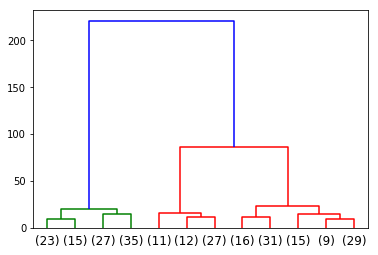

In [22]:
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=12,  
)
plt.show()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

From the above truncated dendogram if we draw a straight line horizontally at y=50 it cuts through 3 vertical lines on X axis

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [23]:
max_d=50
clusters=fcluster(Z,max_d,criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

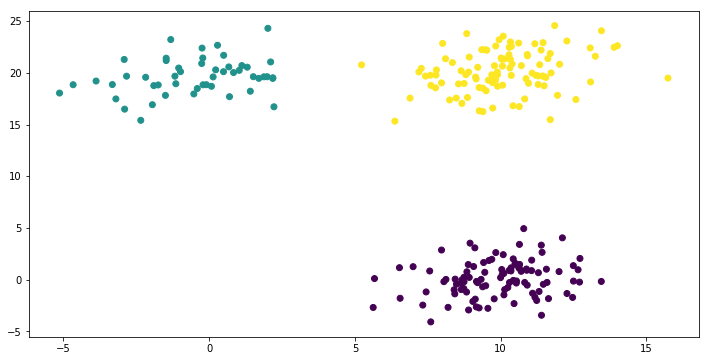

In [24]:
plt.figure(figsize=(12,6))
plt.scatter(x=df['X1'],y=df['X2'],c=clusters)